<a href="https://colab.research.google.com/github/filladani/Machine-Learning_2024/blob/main/JS9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

### Langkah 1 - Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Langkah 2 - Load Data dan Visualisasi

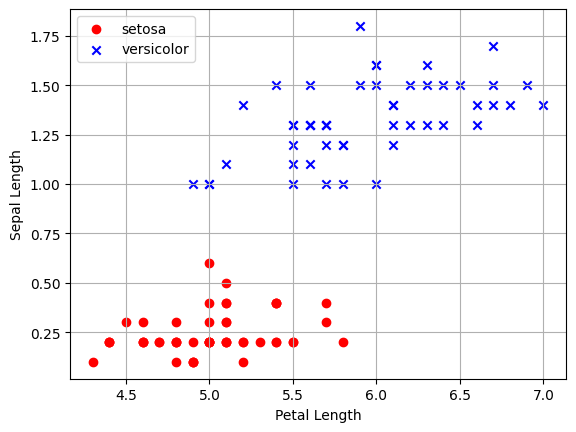

In [8]:
df = pd.read_csv('/content/iris .csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [9]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [10]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

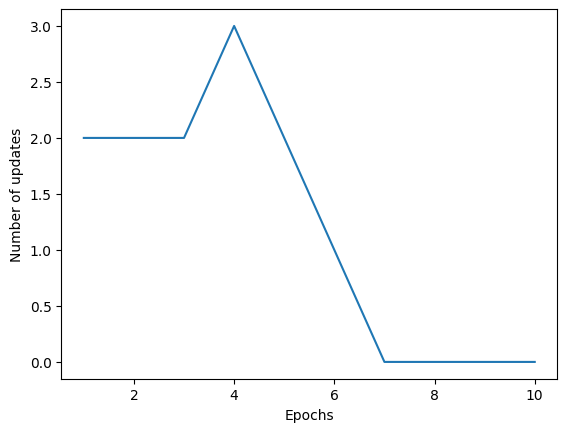

In [12]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

<ipython-input-14-e16acb07e345>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


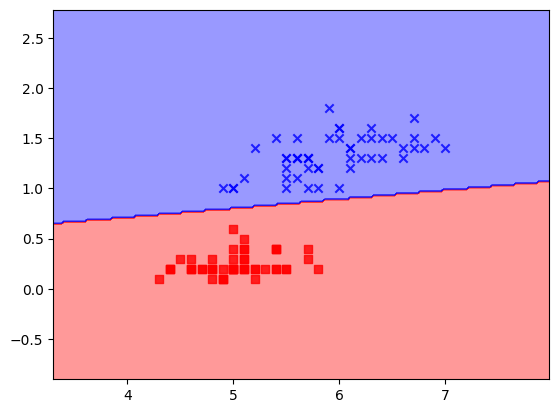

In [14]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plot_decision_regions(X, y, classifier=ppn)

# Praktikum 2

In [15]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [16]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [17]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# Praktikum 3

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [20]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [21]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Praktikum 4

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [23]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [24]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [31]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [33]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5619 - loss: 0.6910
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8028 - loss: 0.4834
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.4662
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8124 - loss: 0.4448
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8040 - loss: 0.4475
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8141 - loss: 0.4300
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8218 - loss: 0.4197
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8247 - loss: 0.4130
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8223 - loss: 0.4239
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8240 - loss: 0.4167
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8223 - loss: 0.4183
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [35]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[False]]


In [36]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1525   70]
 [ 208  197]]


0.861

# Tugas

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [39]:
# Mengimport data mnist dan membaginya menjadi data latih dan data uji
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [40]:
print("X train : ", X_train.shape)
print("y train : ", y_train.shape)
print("X test : ", X_test.shape)
print("y test : ", y_test.shape)

X train :  (60000, 28, 28)
y train :  (60000,)
X test :  (10000, 28, 28)
y test :  (10000,)


In [41]:
# Melakukan proses normalisasi
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [42]:
# Membuat model sequential menggunakan Tensorflow
ann = tf.keras.models.Sequential()

# Menambahkan input layer
ann.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Menambahkan hidden layer
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Menambahkan output layer
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [44]:
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [45]:
ann.fit(X_train, y_train, epochs=100, batch_size=100) # Melatih ANN model dengan maksimal 100 Epoch atau iterasi dan 100 sampel latihan

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8424 - loss: 0.5804
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9622 - loss: 0.1249
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9756 - loss: 0.0785
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9834 - loss: 0.0549
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9886 - loss: 0.0368
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9911 - loss: 0.0280
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9938 - loss: 0.0213
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9958 - loss: 0.0145
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9954 - loss: 0.0137
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9972 - loss: 0.0097
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9968 - loss: 0.0106
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━

In [46]:
# Membuat prediksi menggunakan model ann yang telah dilatih
pred = ann.predict(X_test)

y_pred = np.argmax(pred, axis = -1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Menghitung skor akurasi
accuracy_score(y_test, y_pred)

[[ 972    1    0    0    2    0    3    0    1    1]
 [   0 1126    1    0    0    0    3    1    3    1]
 [   2    2 1014    1    3    0    1    3    5    1]
 [   0    0    3  988    0    8    0    3    4    4]
 [   0    0    2    0  967    0    4    1    2    6]
 [   2    0    1   10    0  869    3    1    4    2]
 [   4    2    0    0    2    3  946    0    1    0]
 [   2    2   11    1    2    1    0 1004    2    3]
 [   2    2    5    3    3    2    1    4  949    3]
 [   0    2    0    4   10    3    0    4    3  983]]


0.9818

from matplotlib import pyplot as plt


def Label_Predict(xtest, ytest, ypred):
    plt.figure(figsize=(10, 7))
    plt.subplots_adjust(wspace=0.5, hspace=1)

    for i, (img, y) in enumerate(zip(X_test[:25].reshape(25, 28, 28), ytest[:25])):
        if ytest[i] == ypred[i]:
            text_color = 'black'
        else:
            text_color = 'red'
            
        plt.subplot(5, 5, 1 + i)
        plt.imshow(img)
        plt.ylabel(f"Predict: {ypred[i]}", color = text_color)
        plt.title(f"{ytest[i]}")
        plt.xticks([])
        plt.yticks([])

In [50]:
from matplotlib import pyplot as plt


def Label_Predict(xtest, ytest, ypred):
    plt.figure(figsize=(10, 7))
    plt.subplots_adjust(wspace=0.5, hspace=1)

    for i, (img, y) in enumerate(zip(X_test[:25].reshape(25, 28, 28), ytest[:25])):
        if ytest[i] == ypred[i]:
            text_color = 'black'
        else:
            text_color = 'red'

        plt.subplot(5, 5, 1 + i)
        plt.imshow(img)
        plt.ylabel(f"Predict: {ypred[i]}", color = text_color)
        plt.title(f"{ytest[i]}")
        plt.xticks([])
        plt.yticks([])

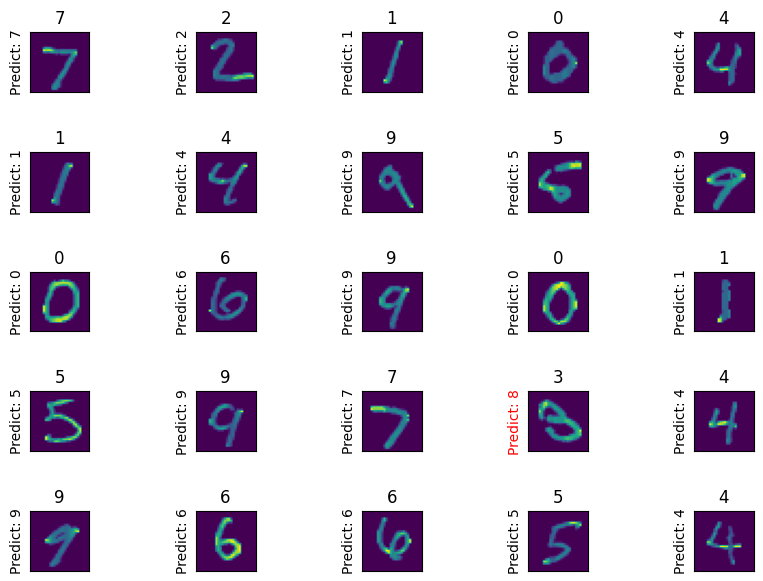

In [51]:
Label_Predict(X_test, y_test, y_pred)